# Crude Oil Production & GDP Impact on Climate Change

### Importing library packages

New Packages **<em>altair,math & vega_datasets<em>** used for Plotting.

In [144]:
# initial imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import panel as pn
from panel.interact import interact
from panel import widgets
from pathlib import Path
from dotenv import load_dotenv
import requests
import altair as alt
from vega_datasets import data
import matplotlib.pyplot as plt
import numpy.random as nrand
import math
import seaborn as sns


%matplotlib inline

## Reading data using Pandas

### Data Sources
https://databank.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG/1ff4a498/Popular-Indicators#

In [145]:
#df = pd.read_excel ("C:\\Users\\16177\\Documents\\FinTech\\Project1\\project_one\\Book.xlsx", index_col="Country Name")
#df.head()
df = pd.read_excel ("C:\\Users\\vinot\\Fintech\\Boot_Camp_Projects\\Project_01\\project_one\\Book.xlsx", index_col="Country Name")
df.head()

1980          1981          1982  \
Country Name                                                           
East Asia & Pacific         4.610634e+12  4.821441e+12  5.010653e+12   
Europe & Central Asia       1.162316e+13  1.168270e+13  1.179325e+13   
European Union              8.037742e+12  8.078099e+12  8.144008e+12   
Latin America & Caribbean   2.491509e+12  2.501017e+12  2.490058e+12   
Middle East & North Africa  1.096173e+12  1.112135e+12  1.090403e+12   

                                    1983          1984          1985  \
Country Name                                                           
East Asia & Pacific         5.215578e+12  5.515624e+12  5.818843e+12   
Europe & Central Asia       1.201923e+13  1.233933e+13  1.268005e+13   
European Union              8.261338e+12  8.466644e+12  8.665661e+12   
Latin America & Caribbean   2.427307e+12  2.519847e+12  2.611752e+12   
Middle East & North Africa  1.061780e+12  1.049167e+12  1.042661e+12   

                                    1986          1987          1988  \
Country Name                                                           
East Asia & Pacific         6.083839e+12  6.441710e+12  6.920498e+12   
Europe & Central Asia       1.303132e+13  1.342920e+13  1.399150e+13   
European Union              8.889776e+12  9.114453e+12  9.494393e+12   
Latin America & Caribbean   2.729115e+12  2.820882e+12  2.850012e+12   
Middle East & North Africa  1.052692e+12  1.054766e+12  1.087020e+12   

                                    1989  ...          2010          2011  \
Country Name                              ...                               
East Asia & Pacific         7.273687e+12  ...  1.698858e+13  1.777184e+13   
Europe & Central Asia       1.448845e+13  ...  2.095923e+13  2.146323e+13   
European Union              9.866972e+12  ...  1.454039e+13  1.480797e+13   
Latin America & Caribbean   2.888749e+12  ...  5.348215e+12  5.581710e+12   
Middle East & North Africa  1.117554e+12  ...  2.766778e+12  2.868623e+12   

                                    2012          2013          2014  \
Country Name                                                           
East Asia & Pacific         1.860607e+13  1.949355e+13  2.031030e+13   
Europe & Central Asia       2.153157e+13  2.172539e+13  2.212354e+13   
European Union              1.469796e+13  1.468951e+13  1.492192e+13   
Latin America & Caribbean   5.737113e+12  5.896884e+12  5.955304e+12   
Middle East & North Africa  2.980196e+12  3.060890e+12  3.149823e+12   

                                    2015          2016          2017  \
Country Name                                                           
East Asia & Pacific         2.116328e+13  2.202916e+13  2.307768e+13   
Europe & Central Asia       2.258278e+13  2.301664e+13  2.365531e+13   
European Union              1.527357e+13  1.558674e+13  1.601169e+13   
Latin America & Caribbean   5.960669e+12  5.940599e+12  6.045888e+12   
Middle East & North Africa  3.224644e+12  3.384665e+12  3.442755e+12   

                                    2018          2019  
Country Name                                            
East Asia & Pacific         2.404002e+13  2.494473e+13  
Europe & Central Asia       2.416814e+13  2.453180e+13  
European Union              1.635542e+13  1.660450e+13  
Latin America & Caribbean   6.140871e+12  6.191944e+12  
Middle East & North Africa  3.524700e+12  3.588456e+12  

[5 rows x 40 columns]

In [146]:
yearly_GDP = df.T
yearly_GDP.head()

yearly_GDP.hvplot(figsize=(20, 10), title="GDP growth");

In [5]:
GDP_pct_change = yearly_GDP.pct_change(fill_method='ffill')
GDP_pct_change.head()

Country Name  East Asia & Pacific  Europe & Central Asia  European Union  \
1980                          NaN                    NaN             NaN   
1981                     0.045722               0.005123        0.005021   
1982                     0.039244               0.009463        0.008159   
1983                     0.040898               0.019162        0.014407   
1984                     0.057529               0.026632        0.024851   

Country Name  Latin America & Caribbean  Middle East & North Africa  \
1980                                NaN                         NaN   
1981                           0.003816                    0.014561   
1982                          -0.004382                   -0.019541   
1983                          -0.025201                   -0.026250   
1984                           0.038125                   -0.011879   

Country Name  North America     World  
1980                    NaN       NaN  
1981               0.026310  0.019217  
1982              -0.019436  0.004322  
1983               0.043860  0.024131  
1984               0.071041  0.045019

In [6]:
GDP_growth = GDP_pct_change.dropna()
GDP_growth.head()

Country Name  East Asia & Pacific  Europe & Central Asia  European Union  \
1981                     0.045722               0.005123        0.005021   
1982                     0.039244               0.009463        0.008159   
1983                     0.040898               0.019162        0.014407   
1984                     0.057529               0.026632        0.024851   
1985                     0.054975               0.027612        0.023506   

Country Name  Latin America & Caribbean  Middle East & North Africa  \
1981                           0.003816                    0.014561   
1982                          -0.004382                   -0.019541   
1983                          -0.025201                   -0.026250   
1984                           0.038125                   -0.011879   
1985                           0.036473                   -0.006201   

Country Name  North America     World  
1981               0.026310  0.019217  
1982              -0.019436  0.004322  
1983               0.043860  0.024131  
1984               0.071041  0.045019  
1985               0.042219  0.037107

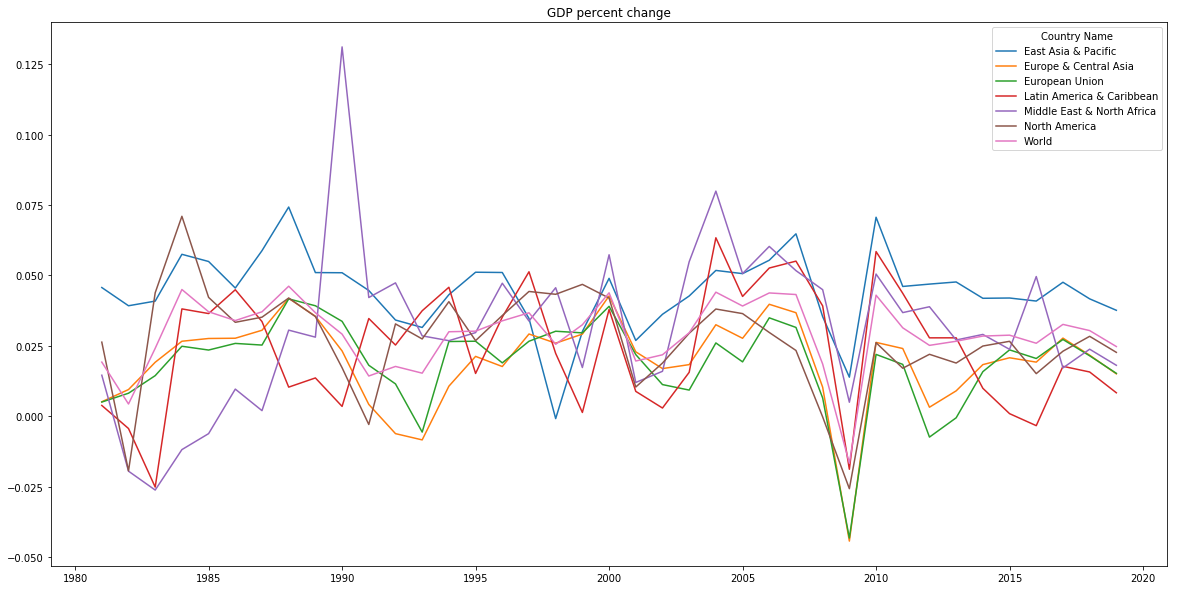

In [7]:
GDP_growth.plot(figsize=(20, 10), title="GDP percent change");

In [8]:
#Emissions_df = pd.read_excel ("C:\\Users\\16177\\Documents\\FinTech\\Project1\\project_one\\Greenhouse_Emissions1.xlsx", index_col="Country Name")
#Emissions_df.head()
Emissions_df= pd.read_excel ("C:\\Users\\vinot\\Fintech\\Boot_Camp_Projects\\Project_01\\project_one\\Greenhouse_Emissions1.xlsx", index_col="Country Name")
Emissions_df.head()

1980          1981          1982  \
Country Name                                                          
East Asia & Pacific        6.918674e+06  6.608208e+06  8.611438e+06   
Europe & Central Asia      1.096177e+07  1.077144e+07  1.067643e+07   
European Union             5.406309e+06  5.240913e+06  5.125474e+06   
Latin America & Caribbean  3.040379e+06  2.928972e+06  3.049425e+06   
North America              6.608491e+06  6.530407e+06  6.111326e+06   

                                   1983          1984          1985  \
Country Name                                                          
East Asia & Pacific        8.075198e+06  7.284011e+06  7.245164e+06   
Europe & Central Asia      1.069261e+07  1.076057e+07  1.087854e+07   
European Union             5.113291e+06  5.150577e+06  5.165148e+06   
Latin America & Caribbean  3.031186e+06  2.776182e+06  2.857617e+06   
North America              6.098981e+06  6.331563e+06  6.354321e+06   

                                   1986          1987          1988  \
Country Name                                                          
East Asia & Pacific        7.910650e+06  8.925836e+06  8.221051e+06   
Europe & Central Asia      1.104853e+07  1.113713e+07  1.129018e+07   
European Union             5.188641e+06  5.187987e+06  5.217134e+06   
Latin America & Caribbean  2.982879e+06  3.287881e+06  3.106320e+06   
North America              6.297473e+06  6.315319e+06  6.809717e+06   

                                   1989  ...          2003          2004  \
Country Name                             ...                               
East Asia & Pacific        8.223285e+06  ...  1.189064e+07  1.353511e+07   
Europe & Central Asia      1.130625e+07  ...  1.041647e+07  9.309385e+06   
European Union             5.220880e+06  ...  4.552726e+06  4.556117e+06   
Latin America & Caribbean  3.158259e+06  ...  3.722931e+06  4.136822e+06   
North America              7.016379e+06  ...  7.943171e+06  8.285000e+06   

                                   2005          2006          2007  \
Country Name                                                          
East Asia & Pacific        1.388218e+07  1.607667e+07  1.532388e+07   
Europe & Central Asia      9.393741e+06  9.694909e+06  9.541145e+06   
European Union             4.524825e+06  4.528050e+06  4.487310e+06   
Latin America & Caribbean  4.714765e+06  3.779499e+06  5.097240e+06   
North America              8.033192e+06  7.889610e+06  8.021019e+06   

                                   2008          2009          2010  \
Country Name                                                          
East Asia & Pacific        1.569545e+07  1.691575e+07  1.695599e+07   
Europe & Central Asia      9.884411e+06  9.020107e+06  9.271013e+06   
European Union             4.418217e+06  4.173804e+06  4.237720e+06   
Latin America & Caribbean  3.739498e+06  3.362268e+06  5.052728e+06   
North America              7.557917e+06  7.354494e+06  7.478081e+06   

                                   2011          2012  
Country Name                                           
East Asia & Pacific        1.827284e+07  1.882291e+07  
Europe & Central Asia      9.372189e+06  9.398207e+06  
European Union             4.160116e+06  4.116310e+06  
Latin America & Caribbean  5.667496e+06  5.746908e+06  
North America              7.605751e+06  7.371537e+06  

[5 rows x 33 columns]

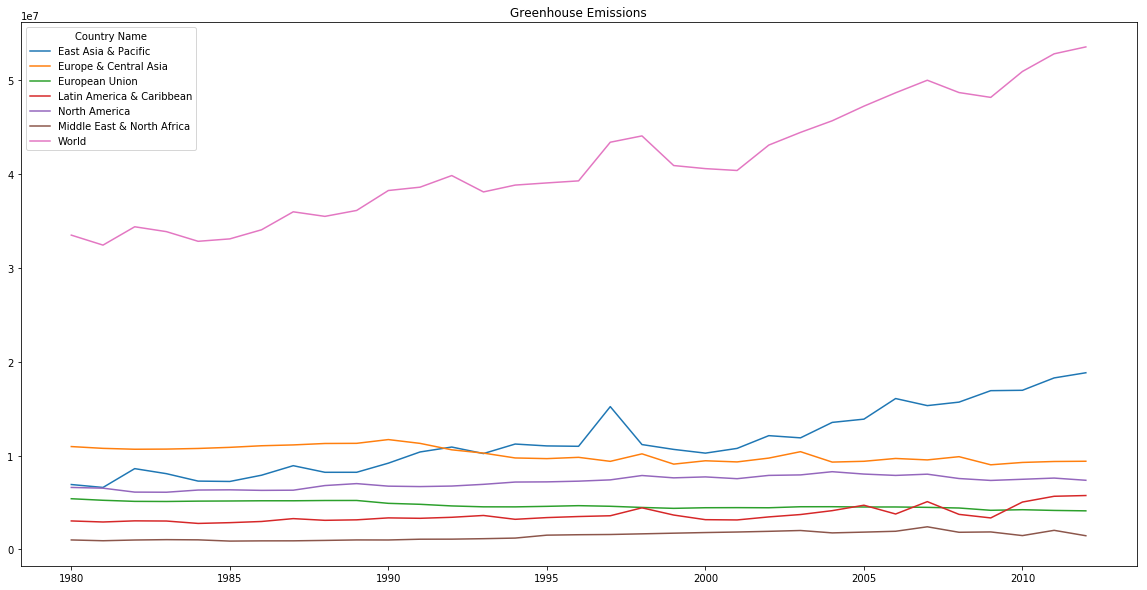

In [9]:
yearly_Emissions = Emissions_df.T
yearly_Emissions.head()

yearly_Emissions.plot(figsize=(20, 10), title="Greenhouse Emissions");

In [10]:
Emissions_pct_change = yearly_Emissions.pct_change(fill_method='ffill')
Emissions_pct_change.head()

Country Name  East Asia & Pacific  Europe & Central Asia  European Union  \
1980                          NaN                    NaN             NaN   
1981                    -0.044874              -0.017364       -0.030593   
1982                     0.303143              -0.008821       -0.022027   
1983                    -0.062271               0.001516       -0.002377   
1984                    -0.097977               0.006356        0.007292   

Country Name  Latin America & Caribbean  North America  \
1980                                NaN            NaN   
1981                          -0.036643      -0.011816   
1982                           0.041125      -0.064174   
1983                          -0.005981      -0.002020   
1984                          -0.084127       0.038135   

Country Name  Middle East & North Africa     World  
1980                                 NaN       NaN  
1981                           -0.083007 -0.031729  
1982                            0.083625  0.060216  
1983                            0.038500 -0.015067  
1984                           -0.020541 -0.030405

In [11]:
Emissions_growth = Emissions_pct_change.dropna()
Emissions_growth.head()

Country Name  East Asia & Pacific  Europe & Central Asia  European Union  \
1981                    -0.044874              -0.017364       -0.030593   
1982                     0.303143              -0.008821       -0.022027   
1983                    -0.062271               0.001516       -0.002377   
1984                    -0.097977               0.006356        0.007292   
1985                    -0.005333               0.010963        0.002829   

Country Name  Latin America & Caribbean  North America  \
1981                          -0.036643      -0.011816   
1982                           0.041125      -0.064174   
1983                          -0.005981      -0.002020   
1984                          -0.084127       0.038135   
1985                           0.029333       0.003594   

Country Name  Middle East & North Africa     World  
1981                           -0.083007 -0.031729  
1982                            0.083625  0.060216  
1983                            0.038500 -0.015067  
1984                           -0.020541 -0.030405  
1985                           -0.129118  0.007850

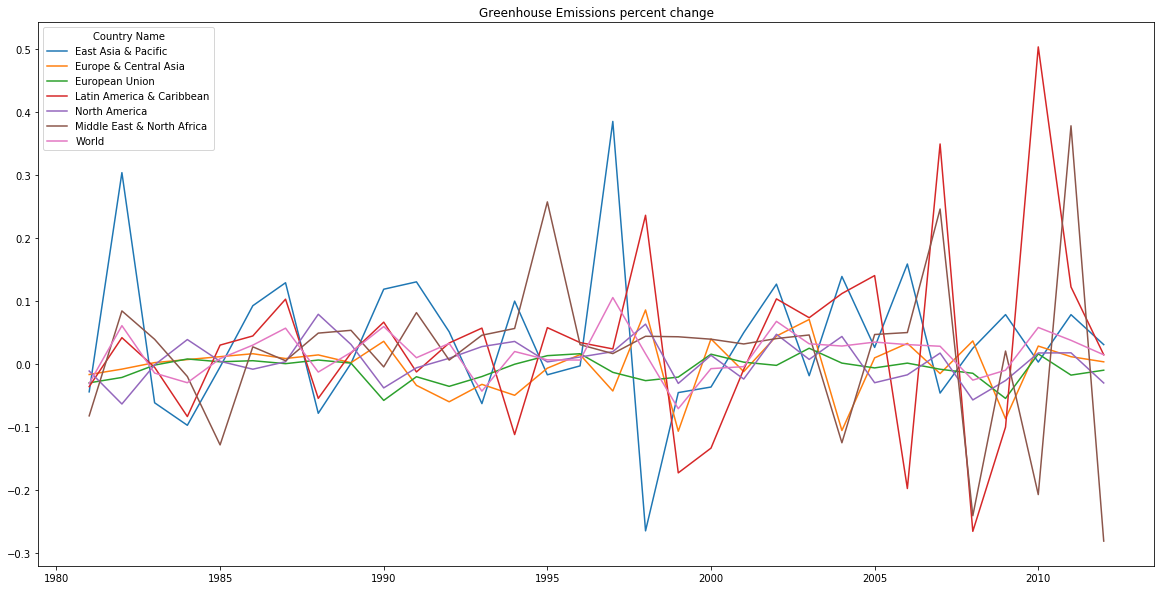

In [12]:
Emissions_growth.plot(figsize=(20, 10), title="Greenhouse Emissions percent change");

### START OF ICE MELT DATA

In [13]:
# Setting path to CSV
csv_data = Path("glacier_data.csv")

# Reading in CSV file
glacier_data = pd.read_csv(csv_data, index_col="Year", infer_datetime_format=True).dropna()
glacier_data.drop(columns=["Number of observations"],inplace=True)
glacier_data.head()

Mean cumulative mass balance
Year                              
1946                        -0.540
1947                        -2.420
1948                        -2.710
1949                        -3.140
1950                        -4.145

**Data Sources**
- https://www.epa.gov/climate-indicators/climate-change-indicators-glaciers
- https://www.epa.gov/climate-indicators/climate-change-indicators-arctic-sea-ice
- https://nsidc.org/data/glacier_inventory/query.html
- https://www.epa.gov/climate-indicators/climate-change-indicators-antarctic-sea-ice

In [14]:
# Plot showing glacier deterioration.  

glacier_data.hvplot(
    title="Glacier Deterioration Based on Cumulative Balance: 1946 - 2015",
    ylabel= "Mean Cumulative Mass Balance",
    height=400,
    width=700)

:Curve   [Year]   (Mean cumulative mass balance)

In [15]:
# Setting path to CSV - Arctic Sea Ice
csv_data = Path("arctic_sea_ice.csv")

# Reading in CSV file
arctic_sea_ice = pd.read_csv(csv_data, index_col="Year")
arctic_sea_ice.head()

September     March
Year                     
1980   3.034763  6.258716
1981   2.799241  6.061804
1982   2.876461  6.266438
1983   2.911210  6.247133
1984   2.745186  6.065665

In [16]:
arctic_sea_ice.hvplot(
    title="Arctic Sea Ice Deterioration from 1980 - 2015",
    ylabel="Sea Ice Amount (million square miles)",
    height=400,
    width=700,
    rot=45,
)

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [17]:
# Setting path to CSV - Antarctic Sea Ice
csv_data = Path("antarctic_sea_ice.csv")

# Reading in CSV file
antarctic_sea_ice = pd.read_csv(csv_data, index_col="Year")
antarctic_sea_ice.head()

February  September
Year                     
1980  1.100391   7.370690
1981  1.111974   7.305053
1982  1.208500   7.200805
1983  1.185334   7.285748
1984  1.057920   7.208527

In [18]:
antarctic_sea_ice.hvplot(
    title="Antarctic Sea Ice Deterioration from 1980 - 2015",
    ylabel="Sea Ice Amount (million square miles)",
    height=400,
    width=700,
    rot=45,
)

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

### Start of Continental Ice Sheet Mapping

In [19]:
# Setting path to CSV - Continental Ice Sheets
csv_data = Path("continental_ice_sheets.csv")

# Reading in CSV file
continental_ice_sheets = pd.read_csv(csv_data)
continental_ice_sheets.head()

wgi_glacier_id  glacier_name    lat    lon   total_area  mean_elev  \
0   GL2U1AG05001                61.41 -45.38       166.08              
1   GL2U1AG07008                61.45 -45.13       100.49              
2   GL2U1AG07024                61.45 -44.98        63.58              
3   GL2U1AG07027                61.46 -44.90        59.81              
4   GL2U1AG07040                61.43 -44.81        61.47              

    primary_class   
0                1  
1                1  
2                1  
3                1  
4                1

In [20]:
# Dropping unneeded columns.
continental_ice_sheets.drop(columns=[" glacier_name", " mean_elev", " primary_class "], inplace=True)


In [21]:
continental_ice_sheets.head()

wgi_glacier_id    lat    lon   total_area
0   GL2U1AG05001  61.41 -45.38       166.08
1   GL2U1AG07008  61.45 -45.13       100.49
2   GL2U1AG07024  61.45 -44.98        63.58
3   GL2U1AG07027  61.46 -44.90        59.81
4   GL2U1AG07040  61.43 -44.81        61.47

In [22]:
# Change column names.
continental_ice_sheets = continental_ice_sheets.rename(columns={
    "wgi_glacier_id":"Ice Sheet ID",
    " lat":"Latitude", 
    " lon":"Longitude", 
    " total_area":"Total Area"
})
continental_ice_sheets.head()

Ice Sheet ID  Latitude  Longitude  Total Area
0  GL2U1AG05001     61.41     -45.38      166.08
1  GL2U1AG07008     61.45     -45.13      100.49
2  GL2U1AG07024     61.45     -44.98       63.58
3  GL2U1AG07027     61.46     -44.90       59.81
4  GL2U1AG07040     61.43     -44.81       61.47

In [23]:
load_dotenv()
mapbox_api_key = os.getenv("MAP_BOX")

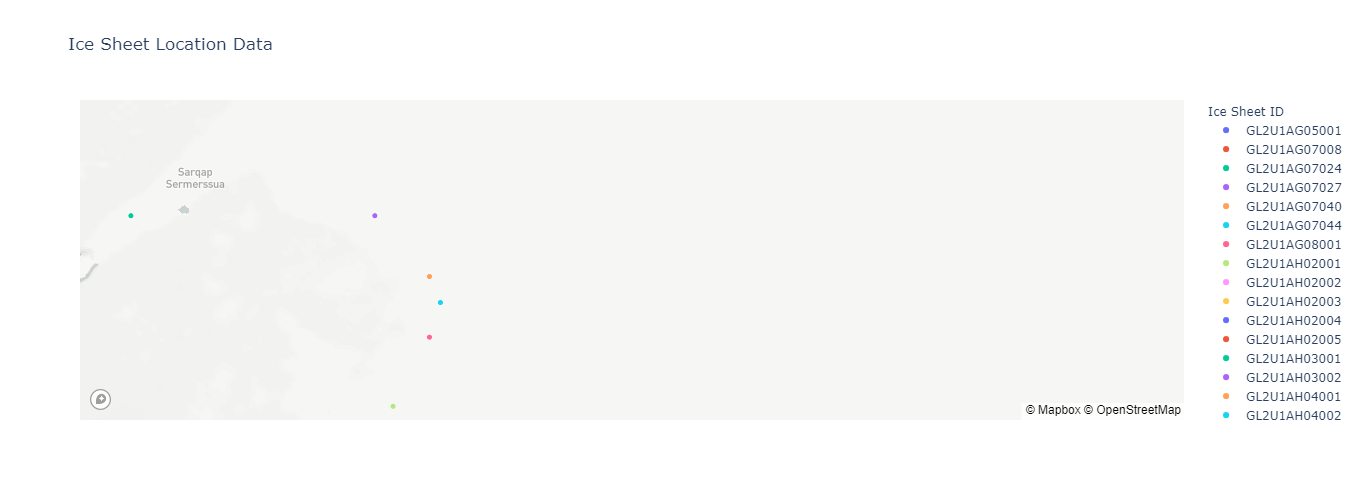

In [24]:
px.set_mapbox_access_token(mapbox_api_key)

ice_sheet_plot = px.scatter_mapbox(
    continental_ice_sheets, 
    lat="Latitude",
    lon="Longitude",
    color="Ice Sheet ID",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="Ice Sheet Location Data",
    height=500,
    width=800
)
ice_sheet_plot.show()

### Start of Ice Field Mapping

In [25]:
# Setting path to CSV - Ice Fields
csv_data = Path("ice_fields.csv")

# Reading in CSV file
ice_fields = pd.read_csv(csv_data)
ice_fields.head()

wgi_glacier_id        glacier_name     lat      lon   total_area  mean_elev  \
0   ID5A01600001      Northwall Firn  -4.057  137.183        3.608       4620   
1   AQ6C20205006   Gourlay Snowfield -60.721  -45.610        0.649        111   
2   CA2M001CB051             AUREOLE  49.582 -125.397        0.610              
3   CA2M001CC028                      49.458 -125.779        0.160              
4   CA2N001AD018                      57.301 -128.266        0.190              

   snow_line_date   
0                   
1                   
2         19570530  
3         19570719  
4         19710811

In [26]:
# Dropping unneeded columns.
ice_fields.drop(columns=[" glacier_name", " mean_elev", " snow_line_date "], inplace=True)

In [27]:
ice_fields.head()

wgi_glacier_id     lat      lon   total_area
0   ID5A01600001  -4.057  137.183        3.608
1   AQ6C20205006 -60.721  -45.610        0.649
2   CA2M001CB051  49.582 -125.397        0.610
3   CA2M001CC028  49.458 -125.779        0.160
4   CA2N001AD018  57.301 -128.266        0.190

In [28]:
# Change column names.
ice_fields = ice_fields.rename(columns={
    "wgi_glacier_id":"Ice Field ID",
    " lat":"Latitude", 
    " lon":"Longitude", 
    " total_area":"Total Area"
})
ice_fields.head()

Ice Field ID  Latitude  Longitude  Total Area
0  ID5A01600001    -4.057    137.183       3.608
1  AQ6C20205006   -60.721    -45.610       0.649
2  CA2M001CB051    49.582   -125.397       0.610
3  CA2M001CC028    49.458   -125.779       0.160
4  CA2N001AD018    57.301   -128.266       0.190

In [29]:
load_dotenv()
mapbox_api_key = os.getenv("MAP_BOX")

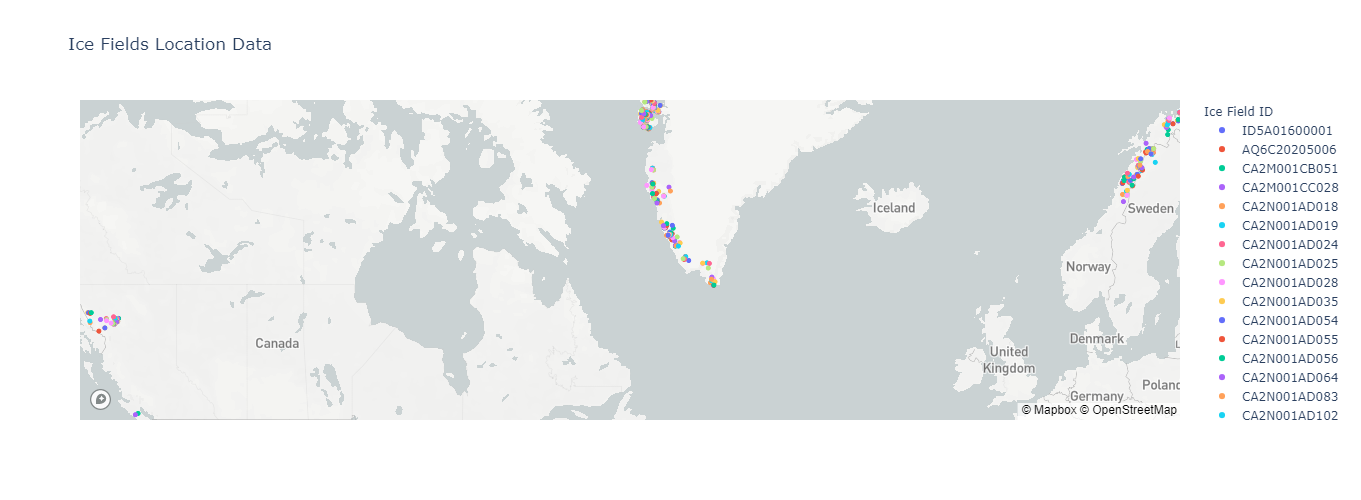

In [30]:
px.set_mapbox_access_token(mapbox_api_key)

ice_fields_plot = px.scatter_mapbox(
   ice_fields, 
   lat="Latitude",
   lon="Longitude",
   color="Ice Field ID",
   color_continuous_scale=px.colors.cyclical.IceFire,
   title="Ice Fields Location Data",
   height=500,
   width=800
)
ice_fields_plot.show()

### Ice Cap Mapping

In [31]:
# Setting path to CSV - Ice Caps
csv_data = Path("ice_caps.csv")

# Reading in CSV file
ice_caps = pd.read_csv(csv_data)
ice_caps.head()

wgi_glacier_id  glacier_name    lat    lon   total_area   mean_elev  \
0   SU5X14107189           189  40.91  74.67          0.2        4350   
1   SU5X14107194           194  40.91  74.83          0.4        4245   
2   SU5X14107198           198  40.94  74.87          0.4        4420   
3   SU5X14107199           199  40.94  74.88          1.4        4345   
4   SU5X14205025            25  41.98  76.69          0.2        4100   

   snow_line_date   
0                   
1                   
2                   
3                   
4         19640000

In [32]:
# Dropping unneeded columns.
ice_caps.drop(columns=[" glacier_name", " mean_elev", " snow_line_date "], inplace=True)

In [33]:
ice_caps.head()

wgi_glacier_id    lat    lon   total_area
0   SU5X14107189  40.91  74.67          0.2
1   SU5X14107194  40.91  74.83          0.4
2   SU5X14107198  40.94  74.87          0.4
3   SU5X14107199  40.94  74.88          1.4
4   SU5X14205025  41.98  76.69          0.2

In [34]:
# Change column names.
ice_caps = ice_caps.rename(columns={
    "wgi_glacier_id":"Ice Field ID",
    " lat":"Latitude", 
    " lon":"Longitude", 
    " total_area":"Total Area"
})
ice_caps.head()

Ice Field ID  Latitude  Longitude  Total Area
0  SU5X14107189     40.91      74.67         0.2
1  SU5X14107194     40.91      74.83         0.4
2  SU5X14107198     40.94      74.87         0.4
3  SU5X14107199     40.94      74.88         1.4
4  SU5X14205025     41.98      76.69         0.2

In [35]:
load_dotenv()
mapbox_api_key = os.getenv("MAP_BOX")

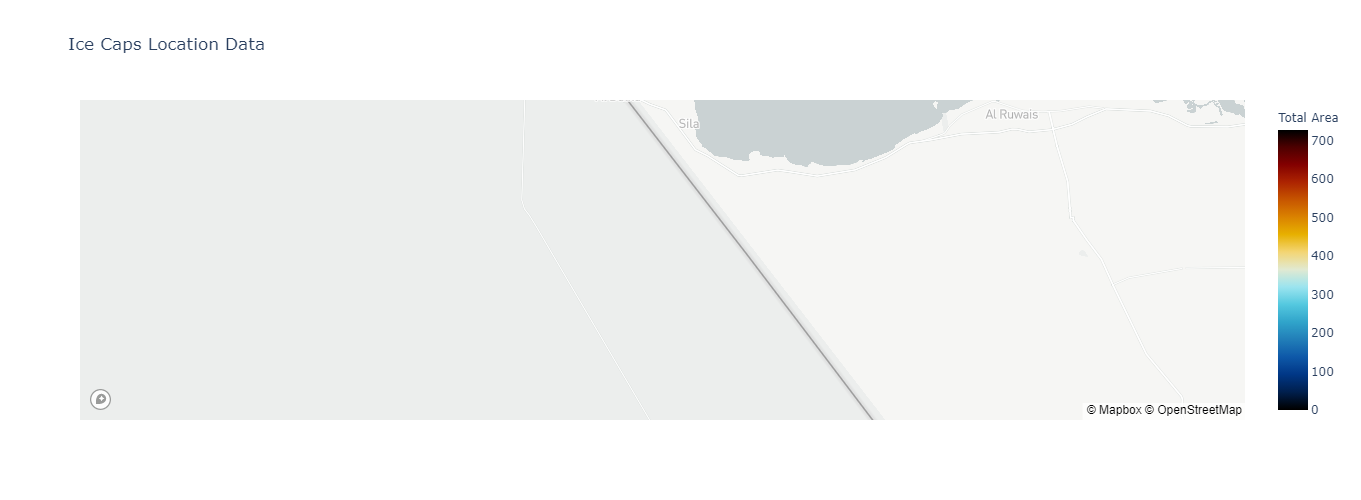

In [36]:
px.set_mapbox_access_token(mapbox_api_key)

ice_caps_plot = px.scatter_mapbox(
   ice_caps, 
   lat="Latitude",
   lon="Longitude",
   color="Total Area",
   color_continuous_scale=px.colors.cyclical.IceFire,
   title="Ice Caps Location Data",
   height=500,
   width=800
)
ice_caps_plot.show()

### Altair Map

In [37]:
glacier_data = glacier_data.reset_index()
glacier_data.head()

Year  Mean cumulative mass balance
0  1946                        -0.540
1  1947                        -2.420
2  1948                        -2.710
3  1949                        -3.140
4  1950                        -4.145

In [38]:
alt.Chart(glacier_data).mark_square().encode(
    alt.X("Year", scale=alt.Scale(domain=(1946, 2020))),
    alt.Y("Mean cumulative mass balance")
)
#https://www.datacamp.com/community/tutorials/altair-in-python

alt.Chart(...)

### MC Simulation for Artic Sea Ice

In [39]:
arctic_sea_ice.head()

September     March
Year                     
1980   3.034763  6.258716
1981   2.799241  6.061804
1982   2.876461  6.266438
1983   2.911210  6.247133
1984   2.745186  6.065665

In [40]:
september_arctic = arctic_sea_ice.drop(columns=["March"])
september_arctic.tail()

September
Year           
2011   1.787653
2012   1.401551
2013   2.065647
2014   2.042480
2015   1.806958

In [41]:
# Getting mean and standard deviation for September arctic data
september_arctic_mean = september_arctic.mean()
september_arctic_std = september_arctic.std()

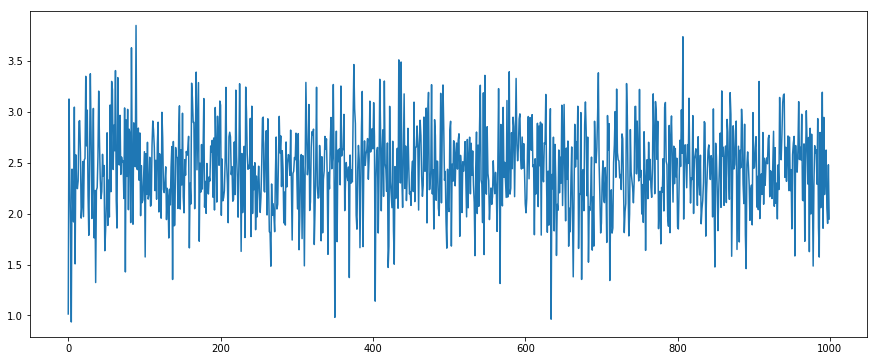

In [42]:
# Running simulations on September arctic data
iterations=1000
september_arctic_plot = np.random.normal(september_arctic_mean,september_arctic_std,iterations)
plt.figure(figsize=(15,6))
plt.plot(september_arctic_plot)
plt.show()

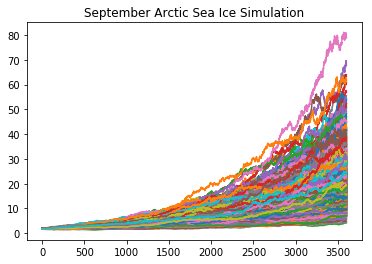

In [43]:
# Define all variables and run MC simulation
start = 1.8
time = 3600
mean = september_arctic_mean
std = september_arctic_std


result = []
for i in range(1000):
    changes = np.random.normal(mean/time,std/math.sqrt(time),time)+1
    
    check_list = [start]
    
    for x in changes:
        check_list.append(check_list[-1]*x)
    result.append(check_list[-1]) 
        
    plt.plot(check_list)
plt.title("September Arctic Sea Ice Simulation")
plt.show()

In [44]:
march_arctic = arctic_sea_ice.drop(columns=["September"])
march_arctic.tail()

March
Year          
2011  5.664119
2012  5.911224
2013  5.853309
2014  5.741339
2015  5.594620

In [45]:
# Getting mean and standard deviation for March arctic data
march_arctic_mean = march_arctic.mean()
march_arctic_std = march_arctic.std()

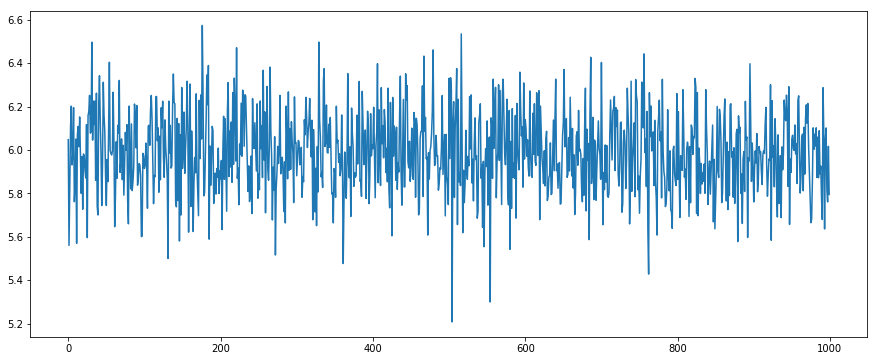

In [46]:
# Running simulations on March arctic data
iterations=1000
march_arctic_plot = np.random.normal(march_arctic_mean,march_arctic_std,iterations)
plt.figure(figsize=(15,6))
plt.plot(march_arctic_plot)
plt.show()

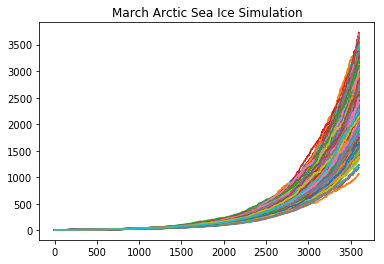

In [47]:
# Define all variables and run MC simulation
start = 5.6
time = 3600
mean = march_arctic_mean
std = march_arctic_std


result = []
for i in range(1000):
    changes = np.random.normal(mean/time,std/math.sqrt(time),time)+1
    
    check_list = [start]
    
    for x in changes:
        check_list.append(check_list[-1]*x)
    result.append(check_list[-1]) 
        
    plt.plot(check_list)
plt.title("March Arctic Sea Ice Simulation")
plt.show()

### MC Simulation for Antartic Sea Ice

In [48]:
antarctic_sea_ice.head()

February  September
Year                     
1980  1.100391   7.370690
1981  1.111974   7.305053
1982  1.208500   7.200805
1983  1.185334   7.285748
1984  1.057920   7.208527

In [49]:
february_antarctic = antarctic_sea_ice.drop(columns=["September"])
february_antarctic.tail()

February
Year          
2011  0.972977
2012  1.393829
2013  1.509659
2014  1.505798
2015  1.455605

In [50]:
# Getting mean and standard deviation for February antarctic data
february_antarctic_mean = february_antarctic.mean()
february_antarctic_std = february_antarctic.std()

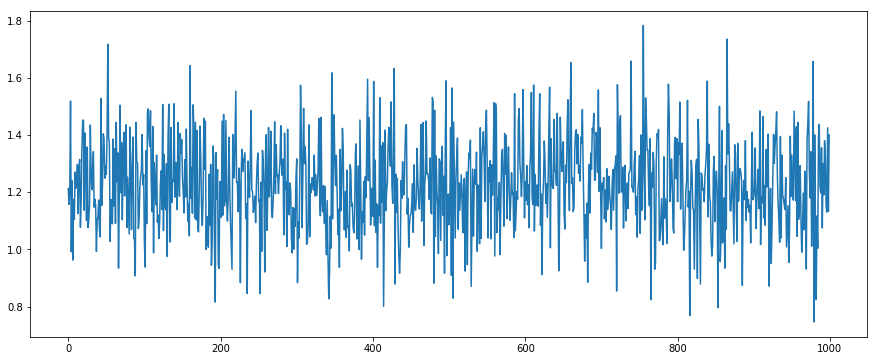

In [51]:
# Running simulations on February antarctic data
iterations=1000
february_antarctic_plot = np.random.normal(
    february_antarctic_mean,february_antarctic_std,iterations)
plt.figure(figsize=(15,6))
plt.plot(february_antarctic_plot)
plt.show()

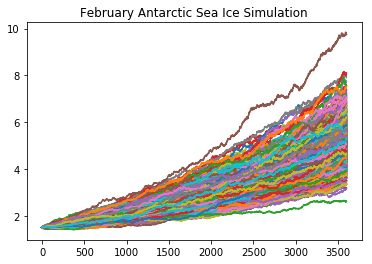

In [52]:
# Define all variables and run MC simulation
start = 1.5
time = 3600
mean = february_antarctic_mean
std = february_antarctic_std


result = []
for i in range(1000):
    changes = np.random.normal(mean/time,std/math.sqrt(time),time)+1
    
    check_list = [start]
    
    for x in changes:
        check_list.append(check_list[-1]*x)
    result.append(check_list[-1]) 
        
    plt.plot(check_list)
plt.title("February Antarctic Sea Ice Simulation")
plt.show()

In [53]:
september_antarctic = antarctic_sea_ice.drop(columns=["February"])
september_antarctic.tail()

September
Year           
2011   7.324358
2012   7.505826
2013   7.656406
2014   7.768375
2015   7.243277

In [54]:
# Getting mean and standard deviation for September antarctic data
september_antarctic_mean = september_antarctic.mean()
september_antarctic_std = september_antarctic.std()

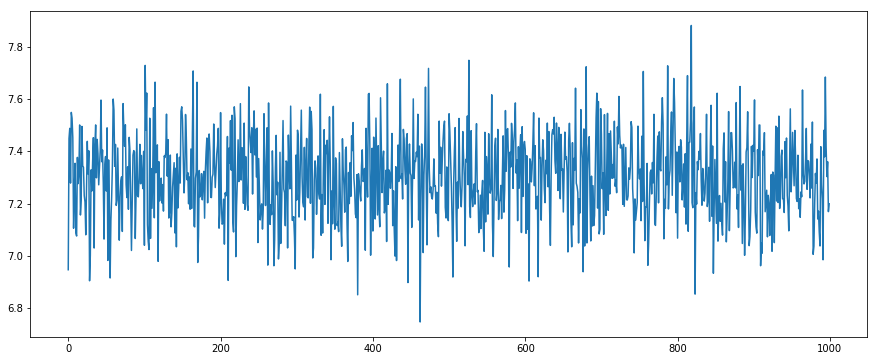

In [55]:
# Running simulations on September antarctic data
iterations=1000
september_antarctic_plot = np.random.normal(
    september_antarctic_mean,september_antarctic_std,iterations)
plt.figure(figsize=(15,6))
plt.plot(september_antarctic_plot)
plt.show()

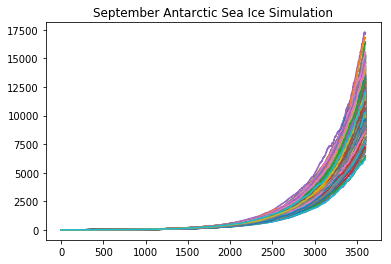

In [56]:
# Define all variables and run MC simulation
start = 7.2
time = 3600
mean = september_antarctic_mean
std = september_antarctic_std


result = []
for i in range(1000):
    changes = np.random.normal(mean/time,std/math.sqrt(time),time)+1
    
    check_list = [start]
    
    for x in changes:
        check_list.append(check_list[-1]*x)
    result.append(check_list[-1]) 
        
    plt.plot(check_list)
plt.title("September Antarctic Sea Ice Simulation")
plt.show()

## Global Temperature,Crude Oil Production & World GDP

#### Global Temperature
**Source : https://data.giss.nasa.gov/gistemp/**

In [57]:
temp=pd.read_excel("C:\\Users\\vinot\\Fintech\\Projects\\Project_01\\Temp_Data_01.xlsx")

**Dataset Cleaning**

In [58]:
temp.set_index(temp["Year"],inplace=True)

In [59]:
temp.drop(columns=["Year","Lowess(5)"],inplace=True)

In [60]:
temp.rename(columns={"Smoothing":"Temp"},inplace=True)

In [61]:
temp.hvplot()

:Curve   [Year]   (Temp)

#### Crude Oil Production

In [62]:
URL = "https://www.indexmundi.com/energy/?product=oil&graph=production"
source_data = pd.read_html(URL)

**Dataset Cleaning**

In [63]:
crude_oil=source_data[5]

In [64]:
crude_oil.set_index(crude_oil["year"],inplace=True)

In [65]:
crude_oil.drop(columns=["year","change"],inplace=True)

In [66]:
crude_oil.rename(columns={"production":"oil_production"},inplace=True)

In [67]:
crude_oil.head()

oil_production
year                
1980         59463.8
1981         55958.4
1982         53367.3
1983         53166.6
1984         54417.6

In [68]:
oil_prcnt_chng=crude_oil.pct_change()
oil_prcnt_chng.head()

oil_production
year                
1980             NaN
1981       -0.058950
1982       -0.046304
1983       -0.003761
1984        0.023530

In [69]:
crude_oil.hvplot()

:Curve   [year]   (oil_production)

#### Global_GDP Data

In [70]:
world_gdp=pd.read_excel("C:\\Users\\vinot\\Fintech\\Boot_Camp_Projects\\Project_01\\project_one\\World_GDP.xlsx",index_col="year")

In [71]:
world_gdp.head()

world_GDP
year              
1980  2.787057e+13
1981  2.840614e+13
1982  2.852892e+13
1983  2.921735e+13
1984  3.053268e+13

In [72]:
world_gdp.hvplot()

:Curve   [year]   (world_GDP)

In [73]:
world_gdp_pct=world_gdp.pct_change()

In [74]:
world_gdp_pct.head()

world_GDP
year           
1980        NaN
1981   0.019217
1982   0.004322
1983   0.024131
1984   0.045019

In [75]:
world_gdp_pct.hvplot()

:Curve   [year]   (world_GDP)

#### Crude Oil & Global Temperature Density plotting

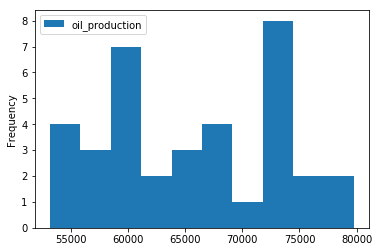

In [76]:
crude_oil.plot.hist(alpha=1);

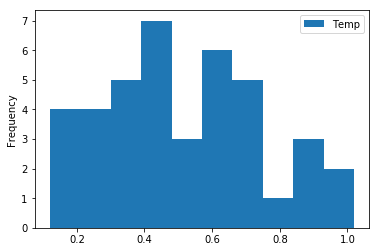

In [77]:
temp.plot.hist(alpha=1);

#### Rename the columns for the Arctic and Antarctic Ice level data

In [78]:
arctic_sea_ice.head()

September     March
Year                     
1980   3.034763  6.258716
1981   2.799241  6.061804
1982   2.876461  6.266438
1983   2.911210  6.247133
1984   2.745186  6.065665

In [79]:
arctic_mar=arctic_sea_ice.drop(columns=["September"])
arctic_mar.head()

March
Year          
1980  6.258716
1981  6.061804
1982  6.266438
1983  6.247133
1984  6.065665

In [80]:
arctic_mar.rename(columns={"March":"artic_mar"},inplace=True)
arctic_mar.head()

artic_mar
Year           
1980   6.258716
1981   6.061804
1982   6.266438
1983   6.247133
1984   6.065665

In [81]:
arctic_sep=arctic_sea_ice.drop(columns=["March"])
arctic_sep.head()

September
Year           
1980   3.034763
1981   2.799241
1982   2.876461
1983   2.911210
1984   2.745186

In [82]:
arctic_sep.rename(columns={"September":"artic_sep"},inplace=True)
arctic_sep.head()

artic_sep
Year           
1980   3.034763
1981   2.799241
1982   2.876461
1983   2.911210
1984   2.745186

In [83]:
antarctic_sea_ice.head()

February  September
Year                     
1980  1.100391   7.370690
1981  1.111974   7.305053
1982  1.208500   7.200805
1983  1.185334   7.285748
1984  1.057920   7.208527

In [84]:
antarctic_feb=antarctic_sea_ice.drop(columns=["September"])
antarctic_feb.head()

February
Year          
1980  1.100391
1981  1.111974
1982  1.208500
1983  1.185334
1984  1.057920

In [85]:
antarctic_feb.rename(columns={"February":"antarctic_feb"},inplace=True)
antarctic_feb.head()

antarctic_feb
Year               
1980       1.100391
1981       1.111974
1982       1.208500
1983       1.185334
1984       1.057920

In [86]:
antarctic_sep=antarctic_sea_ice.drop(columns=["February"])
antarctic_sep.head()

September
Year           
1980   7.370690
1981   7.305053
1982   7.200805
1983   7.285748
1984   7.208527

In [87]:
antarctic_sep.rename(columns={"September":"antarctic_sep"},inplace=True)
antarctic_sep.head()

antarctic_sep
Year               
1980       7.370690
1981       7.305053
1982       7.200805
1983       7.285748
1984       7.208527

#### Dataframe 1:Concatenate Crude oil and Global Temperature

This combines <strong><em>World Temperature Data and World Oil Production data</em></strong>

In [88]:
combined_df_1=pd.concat([temp,crude_oil],axis="columns",join="inner")

In [89]:
combined_df_1.head()

Temp  oil_production
1980  0.26         59463.8
1981  0.32         55958.4
1982  0.14         53367.3
1983  0.31         53166.6
1984  0.16         54417.6

In [90]:
combined_df_1.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### Dataframe 2: Concatenate with Percentage change in Oil Production & Global Temperature

This combines World <strong><em>Temperature Data and Percentage change World Oil Production</em></strong>

In [91]:
pct_combined_df_2=pd.concat([temp,oil_prcnt_chng],axis="columns",join="inner")
pct_combined_df_2.head()

Temp  oil_production
1980  0.26             NaN
1981  0.32       -0.058950
1982  0.14       -0.046304
1983  0.31       -0.003761
1984  0.16        0.023530

In [92]:
pct_combined_df_2.hvplot(figsize=(20,15))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### Dataframe 3:Concatenate with Percentage change in Oil Production & Percentage change in World GDP

This combines <strong><em>Percentage change in World Oil Production and Percentage change in World GDP</em></strong>

In [93]:
pct_combined_df_3=pd.concat([oil_prcnt_chng,world_gdp_pct],axis="columns",join="inner")
pct_combined_df_3.head()

oil_production  world_GDP
year                           
1980             NaN        NaN
1981       -0.058950   0.019217
1982       -0.046304   0.004322
1983       -0.003761   0.024131
1984        0.023530   0.045019

In [94]:
pct_combined_df_3.hvplot()

:NdOverlay   [Variable]
   :Curve   [year]   (value)

#### Dataframe 4:Concatenate with Temperature and Arctic Ice level in March

This combines <strong><em>World Temperature and Arctic Ice level in March</em></strong>

In [95]:
temp_artic_march_df_4=pd.concat([temp,arctic_mar],axis="columns",join="inner")
temp_artic_march_df_4.head()

Temp  artic_mar
Year                 
1980  0.26   6.258716
1981  0.32   6.061804
1982  0.14   6.266438
1983  0.31   6.247133
1984  0.16   6.065665

In [96]:
temp_artic_march_df_4.hvplot()

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

#### Dataframe 5:Concatenate with Temperature and Arctic Ice level in September

This combines <strong><em>World Temperature and Arctic Ice level in September</em></strong>

In [97]:
temp_artic_sep_5=pd.concat([temp,arctic_sep],axis="columns",join="inner")
temp_artic_sep_5.head()

Temp  artic_sep
Year                 
1980  0.26   3.034763
1981  0.32   2.799241
1982  0.14   2.876461
1983  0.31   2.911210
1984  0.16   2.745186

In [98]:
temp_artic_sep_5.hvplot()

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

#### Dataframe 6:Concatenate with Temperature and Antarctic Ice level in February

This combines <strong><em>World Temperature and Antarctic Ice level in February</em></strong>

In [99]:
temp_antartic_feb_6=pd.concat([temp,antarctic_feb],axis="columns",join="inner")
temp_antartic_feb_6.head()

Temp  antarctic_feb
Year                     
1980  0.26       1.100391
1981  0.32       1.111974
1982  0.14       1.208500
1983  0.31       1.185334
1984  0.16       1.057920

In [100]:
temp_antartic_feb_6.hvplot()

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

#### Dataframe 7:Concatenate with Temperature and Antarctic Ice level in September

This combines <strong><em>World Temperature and Antarctic Ice level in September</em></strong>

In [101]:
temp_antartic_sep_7=pd.concat([temp,antarctic_sep],axis="columns",join="inner")
temp_antartic_sep_7.head()

Temp  antarctic_sep
Year                     
1980  0.26       7.370690
1981  0.32       7.305053
1982  0.14       7.200805
1983  0.31       7.285748
1984  0.16       7.208527

In [102]:
temp_antartic_sep_7.hvplot()

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

#### Dataframe 8:Concatenate Temperature Data, oil_pct_change,World_GDP_pct_change & Sea Ice levels of Arctic and Antarctic

This combines <strong><em>Temperature Data,World Oil Production percentage change,World GDP percentage change and Sea Ice Levels</em></strong>

In [103]:
overall_combined_df_8=pd.concat([temp,oil_prcnt_chng,world_gdp_pct,arctic_mar,arctic_sep,antarctic_feb,antarctic_sep],axis="columns",join="inner")
overall_combined_df_8.head()

Temp  oil_production  world_GDP  artic_mar  artic_sep  antarctic_feb  \
1980  0.26             NaN        NaN   6.258716   3.034763       1.100391   
1981  0.32       -0.058950   0.019217   6.061804   2.799241       1.111974   
1982  0.14       -0.046304   0.004322   6.266438   2.876461       1.208500   
1983  0.31       -0.003761   0.024131   6.247133   2.911210       1.185334   
1984  0.16        0.023530   0.045019   6.065665   2.745186       1.057920   

      antarctic_sep  
1980       7.370690  
1981       7.305053  
1982       7.200805  
1983       7.285748  
1984       7.208527

In [104]:
overall_combined_df_8.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### Dataframe 9:Concatenate with oil production and Arctic Ice level in March

This combines <strong><em>World Oil production and Arctic Ice level in March</em></strong>

In [105]:
oil_arctic_mar_9=pd.concat([crude_oil,arctic_mar],axis="columns",join="inner")
oil_arctic_mar_9.head()

oil_production  artic_mar
1980         59463.8   6.258716
1981         55958.4   6.061804
1982         53367.3   6.266438
1983         53166.6   6.247133
1984         54417.6   6.065665

In [106]:
oil_arctic_mar_9.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### Dataframe 10:Concatenate with oil production and Arctic Ice level in September

This combines <strong><em>World Oil production and Arctic Ice level in September</em></strong>

In [107]:
oil_arctic_sep_10=pd.concat([crude_oil,arctic_sep],axis="columns",join="inner")
oil_arctic_sep_10.head()

oil_production  artic_sep
1980         59463.8   3.034763
1981         55958.4   2.799241
1982         53367.3   2.876461
1983         53166.6   2.911210
1984         54417.6   2.745186

In [108]:
oil_arctic_sep_10.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### Dataframe 11:Concatenate with oil production and Antarctic Ice level in Feb

This combines <strong><em>World Oil production and Antarctic Ice level in Feb</em></strong>

In [109]:
oil_antarctic_feb_11=pd.concat([crude_oil,antarctic_feb],axis="columns",join="inner")
oil_antarctic_feb_11.head()

oil_production  antarctic_feb
1980         59463.8       1.100391
1981         55958.4       1.111974
1982         53367.3       1.208500
1983         53166.6       1.185334
1984         54417.6       1.057920

In [110]:
oil_antarctic_feb_11.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### Dataframe 12:Concatenate with oil production and Antarctic Ice level in Sep

This combines <strong><em>World Oil production and Antarctic Ice level in Sep</em></strong>

In [111]:
oil_antarctic_sep_12=pd.concat([crude_oil,antarctic_sep],axis="columns",join="inner")
oil_antarctic_sep_12.head()

oil_production  antarctic_sep
1980         59463.8       7.370690
1981         55958.4       7.305053
1982         53367.3       7.200805
1983         53166.6       7.285748
1984         54417.6       7.208527

In [112]:
oil_antarctic_sep_12.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

## Correlation Calculations

#### Calculate Correlation between Temperature and Crude Oil Production

In [113]:
oil_temp_correlation = combined_df_1.corr()
oil_temp_correlation

Temp  oil_production
Temp            1.000000        0.919934
oil_production  0.919934        1.000000

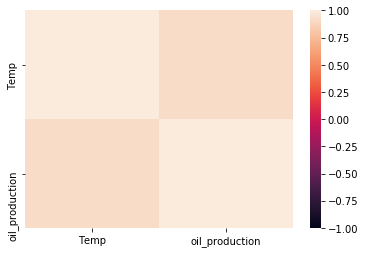

In [114]:
sns.heatmap(oil_temp_correlation, vmin=-1, vmax=1)

#### Calculate the Correlation between World Temperature and Percentage change in oil production

In [115]:
pct_oil_temp_correlation = pct_combined_df_2.corr()
pct_oil_temp_correlation

Temp  oil_production
Temp            1.000000        0.190769
oil_production  0.190769        1.000000

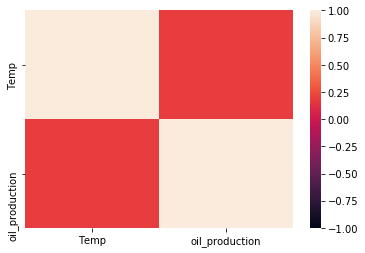

In [116]:
sns.heatmap(pct_oil_temp_correlation, vmin=-1, vmax=1)

#### Calculate the Correlation between World Temperature and Arctic ice Sheet of March

In [117]:
wrld_arctic_ice_mar_correlation = temp_artic_march_df_4.corr()
wrld_arctic_ice_mar_correlation

Temp  artic_mar
Temp       1.000000  -0.778812
artic_mar -0.778812   1.000000

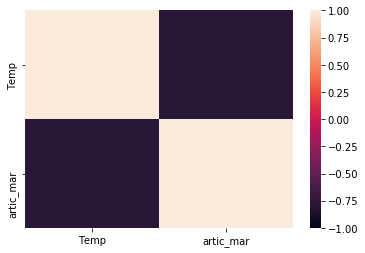

In [118]:
sns.heatmap(wrld_arctic_ice_mar_correlation, vmin=-1, vmax=1)

#### Calculate the Correlation between World Temperature and Arctic ice Sheet of September

In [119]:
wrld_arctic_ice_sep_correlation = temp_artic_sep_5.corr()
wrld_arctic_ice_sep_correlation

Temp  artic_sep
Temp       1.00000   -0.80378
artic_sep -0.80378    1.00000

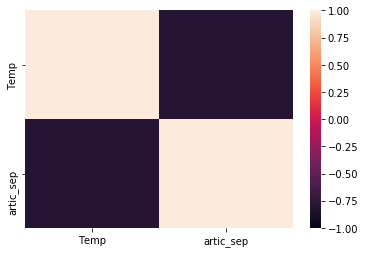

In [120]:
sns.heatmap(wrld_arctic_ice_sep_correlation, vmin=-1, vmax=1)

#### Calculate the Correlation between World Temperature and Antarctic ice Sheet of Feb

In [121]:
wrld_antarctic_ice_feb_correlation = temp_antartic_feb_6.corr()
wrld_antarctic_ice_feb_correlation

Temp  antarctic_feb
Temp           1.000000       0.436462
antarctic_feb  0.436462       1.000000

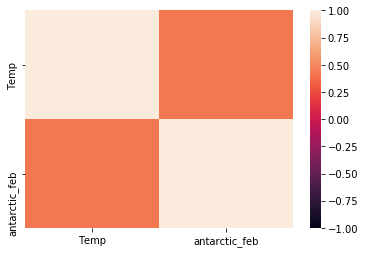

In [122]:
sns.heatmap(wrld_antarctic_ice_feb_correlation, vmin=-1, vmax=1)

#### Calculate the Correlation between World Temperature and Antarctic ice Sheet of Sep

In [123]:
wrld_antarctic_ice_sep_correlation = temp_antartic_sep_7.corr()
wrld_antarctic_ice_sep_correlation

Temp  antarctic_sep
Temp           1.000000       0.472121
antarctic_sep  0.472121       1.000000

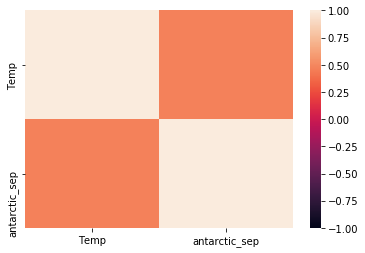

In [124]:
sns.heatmap(wrld_antarctic_ice_sep_correlation, vmin=-1, vmax=1)

#### Calculate Correlation between Percentage change in oil production and World GDP.

In [125]:
pct_oil_gdp_correlation = pct_combined_df_3.corr()
pct_oil_gdp_correlation

oil_production  world_GDP
oil_production        1.000000   0.557318
world_GDP             0.557318   1.000000

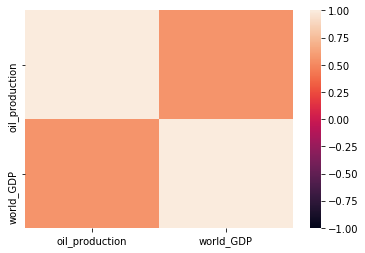

In [126]:
sns.heatmap(pct_oil_gdp_correlation, vmin=-1, vmax=1)

#### Calculate Correlation between all data sets Temperature,oil Percentage change, World GDP change and Ice Sheets

In [127]:
overall_correlation = overall_combined_df_8.corr()
overall_correlation

Temp  oil_production  world_GDP  artic_mar  artic_sep  \
Temp            1.000000        0.190769   0.012613  -0.778812  -0.803780   
oil_production  0.190769        1.000000   0.557318  -0.122032  -0.100705   
world_GDP       0.012613        0.557318   1.000000  -0.156737   0.020292   
artic_mar      -0.778812       -0.122032  -0.156737   1.000000   0.740986   
artic_sep      -0.803780       -0.100705   0.020292   0.740986   1.000000   
antarctic_feb   0.436462        0.242743  -0.112935  -0.200698  -0.341239   
antarctic_sep   0.472121        0.018551   0.130839  -0.487288  -0.434131   

                antarctic_feb  antarctic_sep  
Temp                 0.436462       0.472121  
oil_production       0.242743       0.018551  
world_GDP           -0.112935       0.130839  
artic_mar           -0.200698      -0.487288  
artic_sep           -0.341239      -0.434131  
antarctic_feb        1.000000       0.101289  
antarctic_sep        0.101289       1.000000

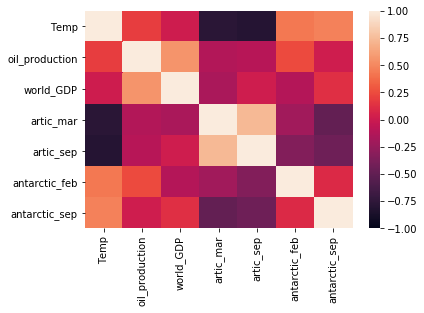

In [128]:
sns.heatmap(overall_correlation, vmin=-1, vmax=1)

#### Calculate Correlation between oil production and Arctic March Ice Sheet levels

In [129]:
oil_arctic_mar_correlation = oil_arctic_mar_9.corr()
oil_arctic_mar_correlation

oil_production  artic_mar
oil_production        1.000000  -0.856603
artic_mar            -0.856603   1.000000

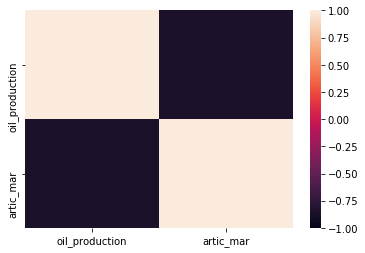

In [130]:
sns.heatmap(oil_arctic_mar_correlation, vmin=-1, vmax=1)

#### Calculate Correlation between oil production and Arctic September Ice Sheet levels

In [131]:
oil_arctic_sep_correlation = oil_arctic_sep_10.corr()
oil_arctic_sep_correlation

oil_production  artic_sep
oil_production        1.000000  -0.848173
artic_sep            -0.848173   1.000000

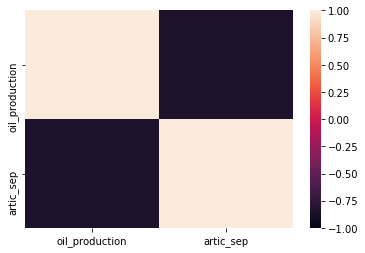

In [132]:
sns.heatmap(oil_arctic_sep_correlation, vmin=-1, vmax=1)

#### Calculate Correlation between oil production and Antarctic Feb Ice Sheet levels

In [133]:
oil_antarctic_feb_correlation = oil_antarctic_feb_11.corr()
oil_antarctic_feb_correlation

oil_production  antarctic_feb
oil_production        1.000000       0.428639
antarctic_feb         0.428639       1.000000

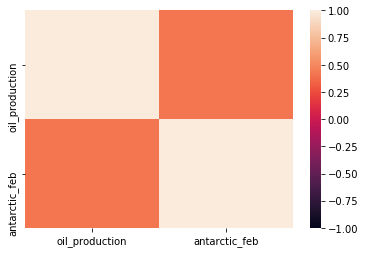

In [134]:
sns.heatmap(oil_antarctic_feb_correlation, vmin=-1, vmax=1)

#### Calculate Correlation between oil production and Antarctic Sep Ice Sheet levels

In [135]:
oil_antarctic_sep_correlation = oil_antarctic_sep_12.corr()
oil_antarctic_sep_correlation

oil_production  antarctic_sep
oil_production        1.000000       0.544617
antarctic_sep         0.544617       1.000000

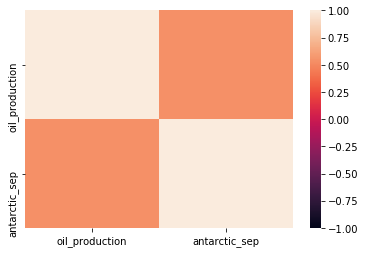

In [136]:
sns.heatmap(oil_antarctic_sep_correlation, vmin=-1, vmax=1)

### Dataframe Plotting using Altair

**Plot diagram for combined data frame_1,which contains Temperature and oil production data**

In [137]:
alt.Chart(combined_df_1).mark_area(filled=True).encode(
alt.X('oil_production'),
    alt.Y('Temp'),
    alt.Size('Temp'),
    alt.Color('Temp'),
    alt.OpacityValue(1.0),
    tooltip=[alt.Tooltip('oil_production:Q'),
            alt.Tooltip('Temp:Q')]
).interactive()

alt.Chart(...)

## Random Number Validation & Monte Carlo simulation for Temperature

**Calculating Mean and Std for the simulation**

In [138]:
temp_mean=temp.mean()
temp_mean

Temp    0.5085
dtype: float64

In [139]:
temp_std=temp.std()
temp_std

Temp    0.240422
dtype: float64

**Possible Temperature forcast for 1000 Iterations**

In [140]:
iterations=1000
rev=np.random.normal(temp_mean,temp_std,iterations)

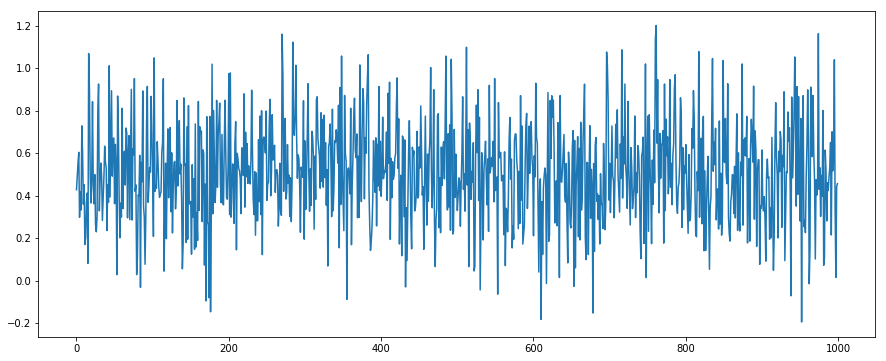

In [141]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

**Monte Carlo Simulation**

- S=Last Recorded Temperature
- T=Number of Iterations
- mu=Temperature Mean
- vol=Temperature Standard Deviation

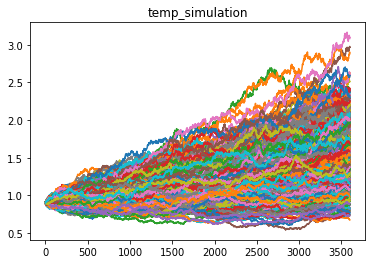

In [142]:
S = 0.90
T = 3600
mu = temp_mean
vol = temp_std

result = []
for i in range(1000):
    changes = np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    check_list = [S]
    
    for x in changes:
        check_list.append(check_list[-1]*x)
    result.append(check_list[-1]) 
        
    plt.plot(check_list)
plt.title('temp_simulation')
plt.show()